**Table of contents**<a id='toc0_' numbering=true></a><a id='toc0_'></a>    
- 1. [Executive Summary](#toc1_)    
- 2. [Introduction](#toc2_)    
    - 2.1.1. [Understand variables and potential data cleaning](#toc2_1_1_)    
- 3. [Exploratory Data Analysis](#toc3_)    
  - 3.1. [Descriptive Statistics of Individual Variables](#toc3_1_)    
    - 3.1.1. [Descriptive Statistics of Nominal Variables](#toc3_1_1_)    
    - 3.1.2. [Descriptive Statistics of Continious Variables](#toc3_1_2_)    
  - 3.2. [Descriptive Statistics of Correlations](#toc3_2_)    
- 4. [What factors influences churn of telecome customers in the United States?](#toc4_)    
  - 4.1. [Two sample t-test - One-sided](#toc4_1_)    
  - 4.2. [Logistic Regression](#toc4_2_)    
    - 4.2.1. [Model-based t-test and EDA](#toc4_2_1_)    
    - 4.2.2. [Model Lasslo L1 Regularization](#toc4_2_2_)    
    - 4.2.3. [Interpreting the Outcome](#toc4_2_3_)    
      - 4.2.3.1. [R Squared (Goodness-of-fit)](#toc4_2_3_1_)    
      - 4.2.3.2. [Confusion Matrix and Accuaracy (Goodness-of-fit)](#toc4_2_3_2_)    
      - 4.2.3.3. [Odds Ratio](#toc4_2_3_3_)    
- 5. [What factors influence the account length of churned telecome customer in the United States?](#toc5_)    
  - 5.1. [Linear Regression](#toc5_1_)    
    - 5.1.1. [Model](#toc5_1_1_)    
    - 5.1.2. [Assumptions Checking](#toc5_1_2_)    
      - 5.1.2.1. [Linearity](#toc5_1_2_1_)    
      - 5.1.2.2. [Homoscedacsity](#toc5_1_2_2_)    
      - 5.1.2.3. [Normality of Residuals](#toc5_1_2_3_)    
      - 5.1.2.4. [Multicollinearity](#toc5_1_2_4_)    
      - 5.1.2.5. [Independence of Errors (autocorrelation of errors)](#toc5_1_2_5_)    
- 6. [Conclusion](#toc6_)

# 1. <a id='toc1_'></a>[Executive Summary](#toc0_)

**Project Goal** bla bla bla

**Key Findings** bla bla bla

# 2. <a id='toc2_'></a>[Introduction](#toc0_)

In the following, we will use the **dataset "HR-Data"** from -, _ (Source: [link](link)). bla bla:

- `Age`: The employee’s age.  
- `Attrition`: Whether the employee has left the company (Yes/No).  
- `BusinessTravel`: Frequency of business travel (e.g., Rarely, Frequently, None).  
- `DailyRate`: Daily rate of pay.  
- `Department`: The department where the employee works (e.g., Sales, HR, R&D).  
- `DistanceFromHome`: Distance between home and workplace (in kilometers).  
- `Education`: Level of education (e.g., High School, Bachelor, Master).  
- `EducationField`: Field of education (e.g., Life Sciences, Engineering).  
- `EmployeeCount`: Number of employees (often a constant in some datasets).  
- `EmployeeNumber`: Unique identifier for the employee.  
- `EnvironmentSatisfaction`: Satisfaction with the work environment (scale).  
- `Gender`: Gender of the employee.  
- `HourlyRate`: Hourly rate of pay.  
- `JobInvolvement`: Level of job involvement (scale).  
- `JobLevel`: Job level or position level.  
- `JobRole`: Job role (e.g., Sales Executive, Research Scientist).  
- `JobSatisfaction`: Satisfaction with the job (scale).  
- `MaritalStatus`: Marital status (e.g., Single, Married).  
- `MonthlyIncome`: Monthly income.  
- `MonthlyRate`: Monthly rate of pay (payroll rate).  
- `NumCompaniesWorked`: Number of previous companies the employee has worked at.  
- `Over18`: Whether the employee is over 18 years old (often a constant).  
- `OverTime`: Whether the employee works overtime (Yes/No).  
- `PercentSalaryHike`: Percentage salary increase.  
- `PerformanceRating`: Performance rating (scale).  
- `RelationshipSatisfaction`: Satisfaction with workplace relationships (scale).  
- `StandardHours`: Standard working hours (often a constant, e.g., 40 hours/week).  
- `StockOptionLevel`: Stock option level.  
- `TotalWorkingYears`: Total years of professional experience.  
- `TrainingTimesLastYear`: Number of training sessions attended last year.  
- `WorkLifeBalance`: Satisfaction with work–life balance (scale).  
- `YearsAtCompany`: Number of years at the current company.  
- `YearsInCurrentRole`: Number of years in the current role.  
- `YearsSinceLastPromotion`: Number of years since the last promotion.  
- `YearsWithCurrManager`: Number of years with the current manager.  


**Research Questions & Hypotheses**
bla bla

1. **What factors influences churn of telecom customers in the United States?** bla bla bla

**T-test Hypotheses**:
    
bla bla

**Logistic Regression Hypotheses**:

   bla bla

    


Importing all neccessary libaries and packages

In [13]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt


### 2.1.1. <a id='toc2_1_1_'></a>[Understand variables and potential data cleaning](#toc0_)
- WEWRIGHT: Understand dataset structure, check missing values, understand variable types
- FIXME: Check unique values and convert binominal values to 0 and 1

In [14]:
csv_data = pd.read_csv('HR-Employee-Attrition.csv')

# Showing dataset
csv_data.head(100)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,...,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,...,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,...,3,80,0,38,1,2,37,10,1,8


REWRITE: General information about the dataset, number of missing values and variable types.

In [15]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

WEWRITE1. Dataset has `20` attributes and `3,333` rows.
2. There are no missing values which `non-null` indicates.
3. The different `types`of variables are shown in the last column
4. The variable names are not following best practice in coding hence we rename the variable

In [16]:
# Checking missing values again
if churn_df.isnull().sum().sum()==0:
    print('There are no missing values')
else:
    print('There are missing values')

NameError: name 'churn_df' is not defined

There are no missing values

Checking unique values for all nominal variables

In [ ]:
# Find unique values of all nominal variables
nominal_variables = ['area_code','state','international_plan','voice_mail_plan','churn']

for column in nominal_variables:
    print(f"There are following unique values in '{column}' column:\n {churn_df[column].unique()}\n")

FIXME: WEWRITE
* `Area code` and `State` are nominal variables with 3 and 51 unique values respectivly.
* `International plan`, `Voice mail Plan` and `Churn` are bi-nominal variables.

Next we will convert the binominal values to `0` and `1`, to be coherent

In [ ]:
churn_df['international_plan'] = churn_df['international_plan'].map({'No': 0, 'Yes': 1})
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].map({'No': 0, 'Yes': 1})
churn_df['area_code'] = churn_df['area_code'].map({408: "408", 415: "415", 510: "510"})
churn_df['churn'] = churn_df['churn'].astype(int)
churn_df.head()


# Data Loading & Preparation
Rows: 1470
Columns: ['Attrition_flag', 'Age', 'Gender', 'Education', 'JobRole', 'MonthlyIncome']
--------------------------------------------------------------------------------
   Attrition_flag  Age  Gender  Education                JobRole  \
0               1   41  Female          2        Sales Executive   
1               0   49    Male          1     Research Scientist   
2               1   37    Male          2  Laboratory Technician   
3               0   33  Female          4     Research Scientist   
4               0   27    Male          1  Laboratory Technician   

   MonthlyIncome  
0           5993  
1           5130  
2           2090  
3           2909  
4           3468  

# 2. Introduction
Research Question:
How do demographic factors (age, gender, education) and job-related factors (job role, monthly income) jointly influence employee attrition?
--------------------------------------------------------------------------------
Variables

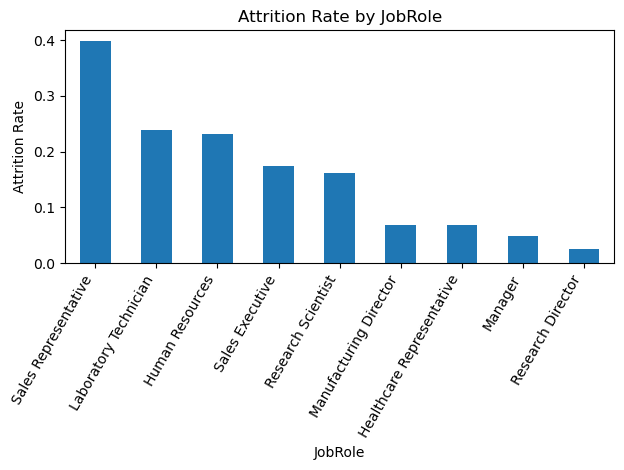

<Figure size 640x480 with 0 Axes>

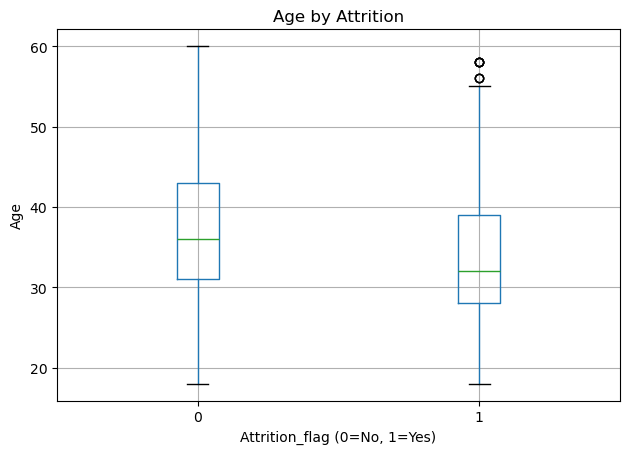

<Figure size 640x480 with 0 Axes>

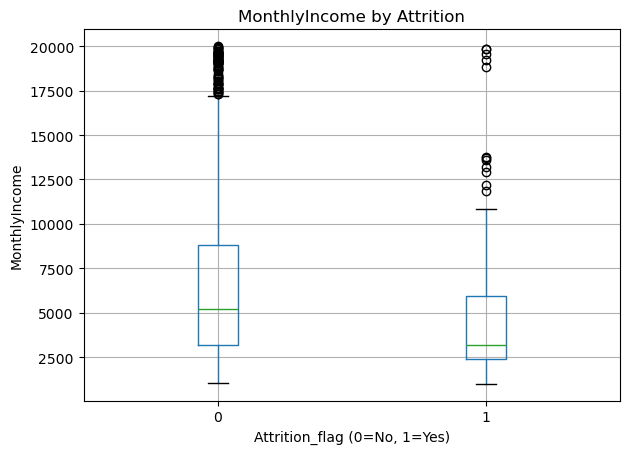


# 4. Hypothesis Testing

## 4.1 T-Tests (Age, MonthlyIncome, Education)
Age:      t=-5.828, p=1.38e-08
Income:   t=-7.483, p=4.43e-13
Education:t=-1.218, p=0.224

## 4.2 Chi-Square Tests (Gender, JobRole, Education categorical)

### Gender
Attrition_flag    0    1
Gender                  
Female          501   87
Male            732  150
Chi2=1.117, dof=1, p=0.291
--------------------------------------------------------------------------------

### JobRole
Attrition_flag               0   1
JobRole                           
Healthcare Representative  122   9
Human Resources             40  12
Laboratory Technician      197  62
Manager                     97   5
Manufacturing Director     135  10
Research Director           78   2
Research Scientist         245  47
Sales Executive            269  57
Sales Representative        50  33
Chi2=86.190, dof=8, p=2.75e-15
--------------------------------------------------------------------------------

### Education
Attrition_flag    0   1
Ed

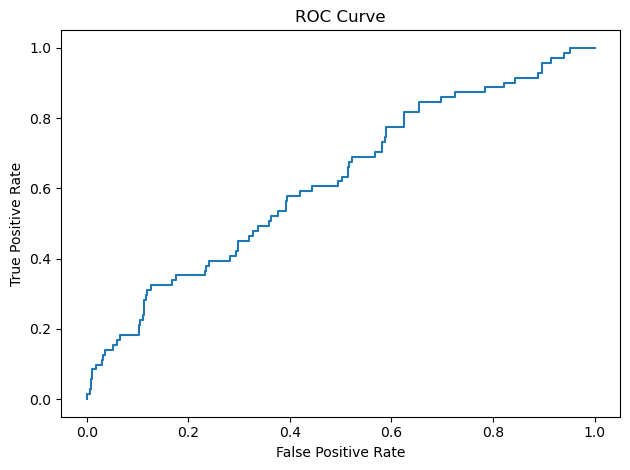


Significant terms (p<0.05): C(JobRole)[T.Sales Representative], C(JobRole)[T.Laboratory Technician], C(JobRole)[T.Human Resources], C(JobRole)[T.Sales Executive], C(JobRole)[T.Research Scientist], Age
McFadden Pseudo R² ≈ 0.077, Accuracy ≈ 0.839, ROC-AUC ≈ 0.621
